In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sales = pd.read_csv(r"C:\Users\nishs\Downloads\DWR Final\train.csv")
test = pd.read_csv(r'C:\Users\nishs\Downloads\DWR Final\test.csv')
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
test.head()

,Comb,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004P00128942,1000004,P00128942,M,46-50,7,B,2,0,1,11.0,NaN
1,1000009P00113442,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010P00288442,1000010,P00288442,F,36-45,1,B,4+,0,5,14.0,NaN
3,1000010P00145342,1000010,P00145342,F,36-45,1,B,4+,0,4,9.0,NaN
4,1000011P00053842,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
submission = pd.DataFrame()

submission['User_ID'] = test['User_ID']
submission['Product_ID'] = test['Product_ID']
submission['Purchase'] = np.nan

In [5]:
submission

,User_ID,Product_ID,Purchase
0,1000004,P00128942,NaN
1,1000009,P00113442,NaN
2,1000010,P00288442,NaN
3,1000010,P00145342,NaN
4,1000011,P00053842,NaN
...,...,...,...
233594,1006036,P00118942,NaN
233595,1006036,P00254642,NaN
233596,1006036,P00031842,NaN
233597,1006037,P00124742,NaN


In [6]:
sales.shape

(550068, 12)

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
sales.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
sales.User_ID.nunique()

5891

In [10]:
sales.Product_ID.nunique()

3631

In [11]:
sales.Gender.value_counts(normalize=True)*100

Gender
M    75.310507
F    24.689493
Name: proportion, dtype: float64

In [12]:
sales.Age.value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [13]:
sales.Occupation.nunique()

21

In [14]:
sales.City_Category.value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [15]:
sales.Stay_In_Current_City_Years.value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [16]:
sales.Marital_Status.value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

In [ ]:
test['Purchase']=np.nan
sales['data']='train'
test['data']='test'
test=test[sales.columns]
combined=pd.concat([sales,test],axis=0)

In [18]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000004,P00128942,M,46-50,7,B,2,0,1,11.0,NaN,NaN,test
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN,test
2,1000010,P00288442,F,36-45,1,B,4+,0,5,14.0,NaN,NaN,test
3,1000010,P00145342,F,36-45,1,B,4+,0,4,9.0,NaN,NaN,test
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN,test


In [19]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [20]:
sales.isna().sum().sort_values(ascending=False)

Product_Category_3            383247
Product_Category_2            173638
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Purchase                           0
data                               0
dtype: int64

In [ ]:
percent = (sales.isnull().sum()/sales.isnull().count()).sort_values(ascending=False)
percent

Product_Category_3            0.696727
Product_Category_2            0.315666
User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Purchase                      0.000000
data                          0.000000
dtype: float64

In [22]:
combined.drop('Product_Category_3',axis=1,inplace=True)

In [23]:
combined.Product_Category_2.value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [ ]:
vc = combined.Product_Category_2.value_counts(normalize = True)
miss = combined.Product_Category_2.isna()
combined.loc[miss, 'Product_Category_2'] = np.random.choice(vc.index, size = miss.sum(), p = vc.values)

In [25]:
combined.Product_Category_2.value_counts()

Product_Category_2
8.0     133032
14.0    114731
2.0     102702
16.0     89885
15.0     78893
5.0      54313
4.0      53725
6.0      34250
11.0     29461
17.0     27885
13.0     22013
9.0      11984
12.0     11361
10.0      6458
3.0       5974
18.0      5781
7.0       1219
Name: count, dtype: int64

In [26]:
combined.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Purchase                      233599
data                               0
dtype: int64

In [ ]:
sales_1 = combined[combined['data']=='train']

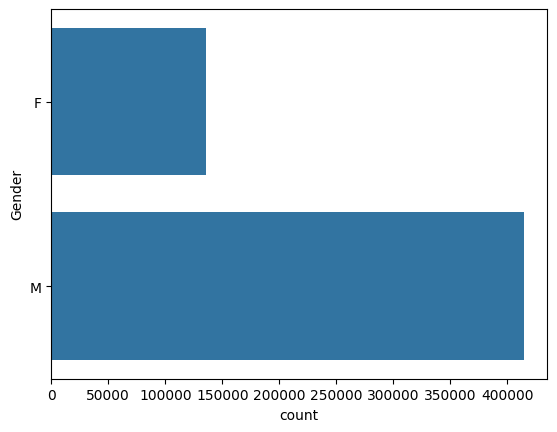

In [28]:
sns.countplot(sales_1['Gender'])
plt.show()

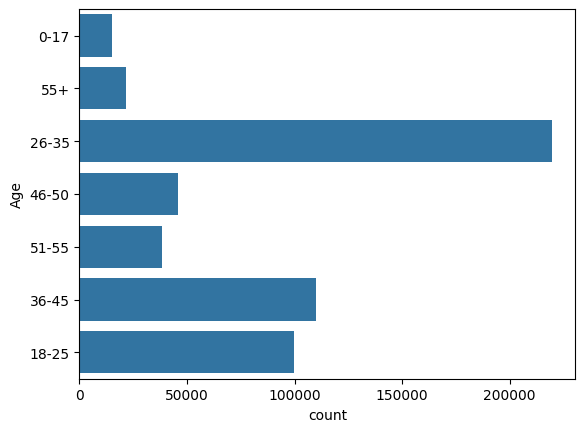

In [29]:
sns.countplot(sales_1['Age'])
plt.show()

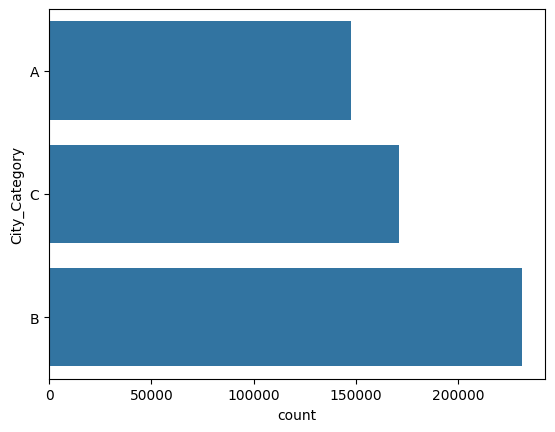

In [31]:
sns.countplot(sales_1['City_Category'])
plt.show()

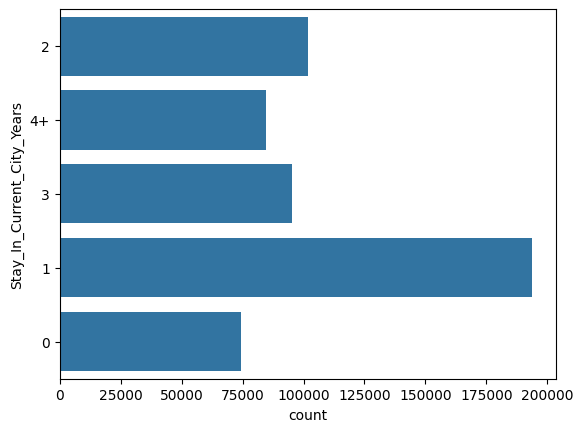

In [32]:
sns.countplot(sales_1['Stay_In_Current_City_Years'])
plt.show()

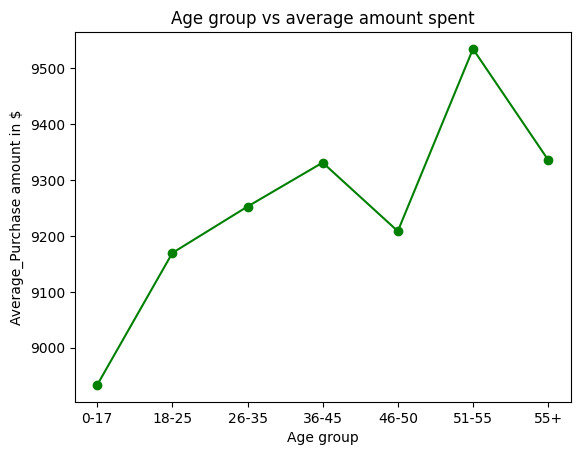

In [ ]:
data = sales_1.groupby('Age')['Purchase'].mean()
plt.plot(data.index,data.values,marker='o',color='g')
plt.xlabel('Age group')
plt.ylabel('Average_Purchase amount in $')
plt.title('Age group vs average amount spent')
plt.show()

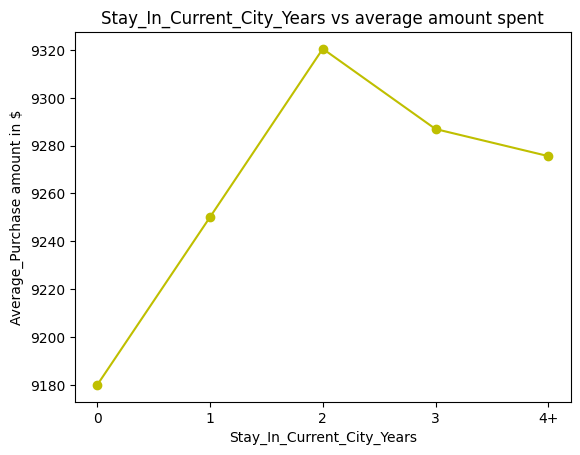

In [ ]:
data = sales_1.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
plt.plot(data.index,data.values,marker='o',color='y')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Average_Purchase amount in $')
plt.title('Stay_In_Current_City_Years vs average amount spent')
plt.show()

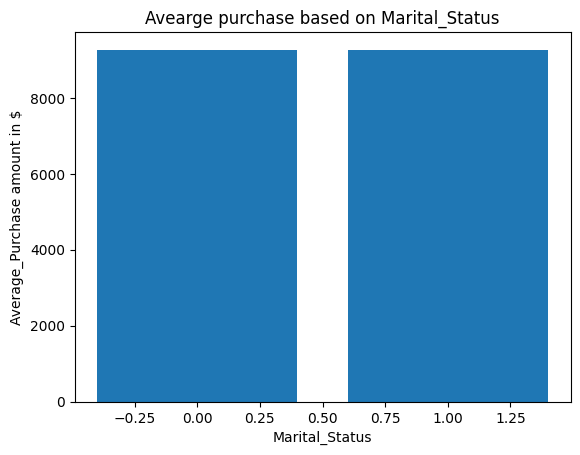

In [ ]:
data = sales_1.groupby('Marital_Status')['Purchase'].mean()
plt.bar(data.index,data.values)
plt.xlabel('Marital_Status');
plt.ylabel('Average_Purchase amount in $');
plt.title('Avearge purchase based on Marital_Status');
plt.show()

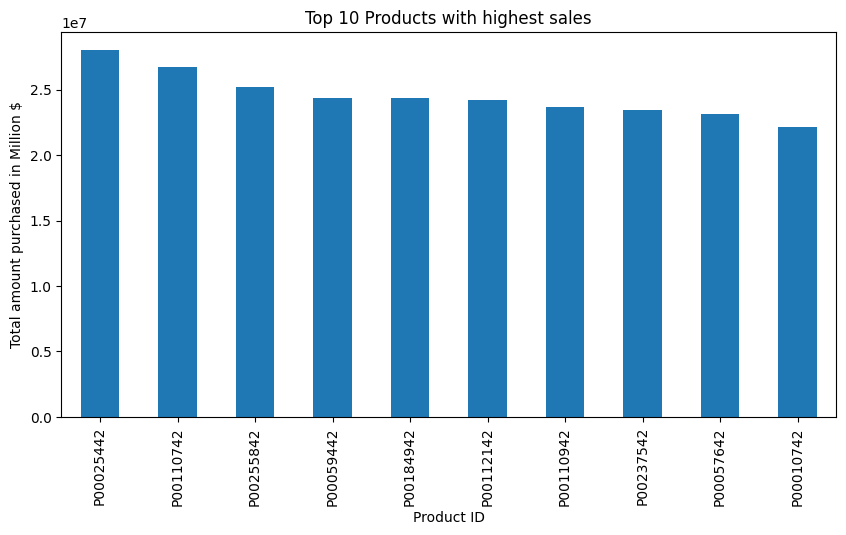

In [ ]:
data = sales_1.groupby("Product_ID").sum()['Purchase']

plt.figure(figsize=(10,5))
data.sort_values(ascending=False)[0:10].plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Product ID')
plt.ylabel('Total amount purchased in Million $')
plt.title('Top 10 Products with highest sales')
plt.show()

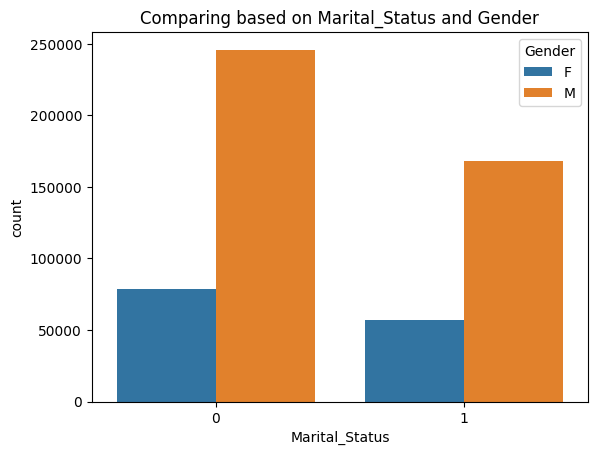

In [ ]:
sns.countplot(x='Marital_Status',data=sales_1,hue='Gender')
plt.title('Comparing based on Marital_Status and Gender')
plt.show()

In [39]:
a =pd.crosstab(sales_1['Age'],sales_1['Product_ID'])
a.idxmax(axis=1)

Age
0-17     P00255842
18-25    P00265242
26-35    P00265242
36-45    P00025442
46-50    P00265242
51-55    P00265242
55+      P00265242
dtype: object

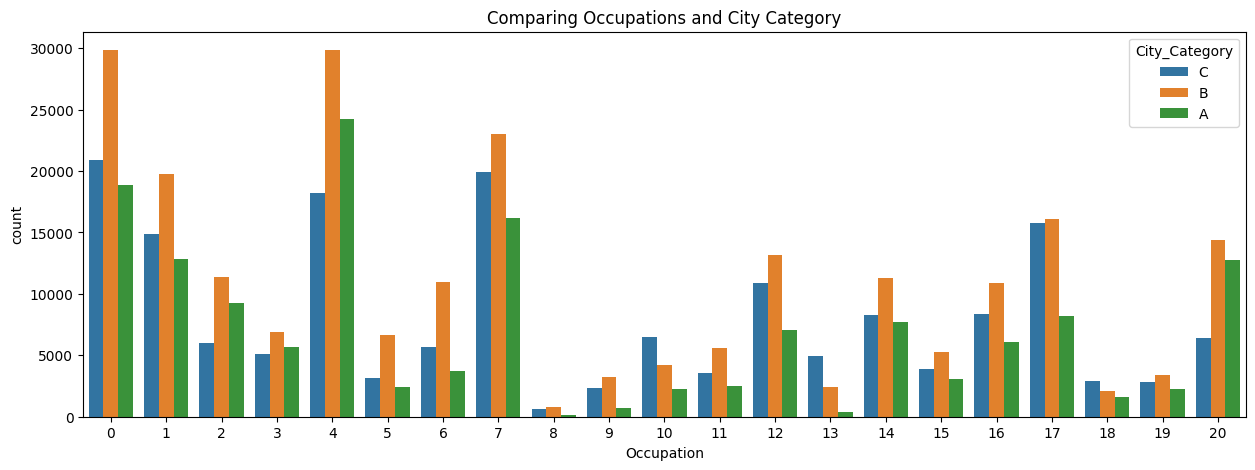

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='Occupation',data=sales_1,hue='City_Category')
plt.title('Comparing Occupations and City Category')
plt.show()

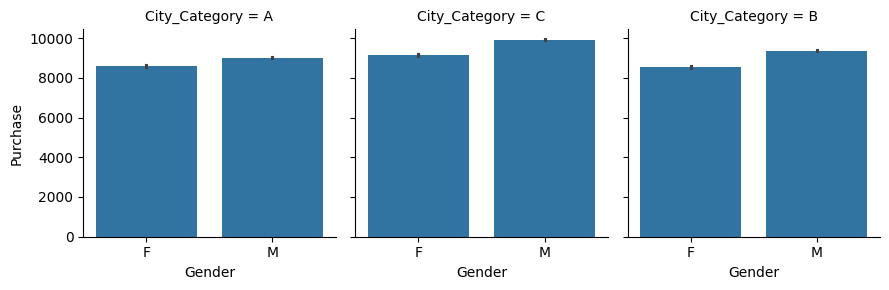

In [ ]:
g = sns.FacetGrid(sales_1,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase")
plt.show()

In [ ]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,14.0,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,2.0,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,14.0,7969.0,train


In [ ]:
combined['User_ID'] = combined['User_ID'] - 1000000

combined['Product_ID'] = combined['Product_ID'].str.replace('P00', '')

combined['Product_ID'] = pd.to_numeric(combined['Product_ID'],errors='coerce')

In [44]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int64  
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  data                        783667 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 77.7+ MB


In [45]:
combined.Product_Category_2 = combined.Product_Category_2.astype('int64')

In [ ]:
cat_cols = combined.select_dtypes(['object']).columns
cat_cols

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'data'], dtype='object')

In [ ]:
combined['Stay_In_Current_City_Years'] =np.where(combined['Stay_In_Current_City_Years'].str[:2]=="4+",4,combined['Stay_In_Current_City_Years'])

combined['Stay_In_Current_City_Years'] = pd.to_numeric(combined['Stay_In_Current_City_Years'],errors='coerce')

In [48]:
combined['Gender'] = combined['Gender'].map({'F':0, 'M':1}).astype(int)

In [ ]:
combined['Age'] = combined['Age'].map({'0-17': 9,
                               '18-25': 22,
                               '26-35': 31,
                               '36-45': 42,
                               '46-50': 48,
                               '51-55': 53,
                               '55+': 60})
combined['Age'].value_counts()

Age
31    313015
42    156724
22    141953
48     65278
53     54784
60     30579
9      21334
Name: count, dtype: int64

In [50]:
combined = pd.get_dummies(combined,columns=['City_Category'],drop_first = True)

In [51]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,14,8370.0,train,False,False
1,1,248942,0,9,10,2,0,1,6,15200.0,train,False,False
2,1,87842,0,9,10,2,0,12,2,1422.0,train,False,False
3,1,85442,0,9,10,2,0,12,14,1057.0,train,False,False
4,2,285442,1,60,16,4,0,8,14,7969.0,train,False,True


In [52]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int64  
 2   Gender                      783667 non-null  int32  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  int64  
 9   Purchase                    550068 non-null  float64
 10  data                        783667 non-null  object 
 11  City_Category_B             783667 non-null  bool   
 12  City_Category_C             783667 non-null  bool   
dtypes: bool(2), float64

In [53]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,14,8370.0,train,False,False
1,1,248942,0,9,10,2,0,1,6,15200.0,train,False,False
2,1,87842,0,9,10,2,0,12,2,1422.0,train,False,False
3,1,85442,0,9,10,2,0,12,14,1057.0,train,False,False
4,2,285442,1,60,16,4,0,8,14,7969.0,train,False,True


In [ ]:
sales = combined[combined['data']=='train']
del sales['data']
test_input = combined[combined['data']=='test']
test_input.drop(['Purchase','data'],axis=1,inplace=True)

del combined

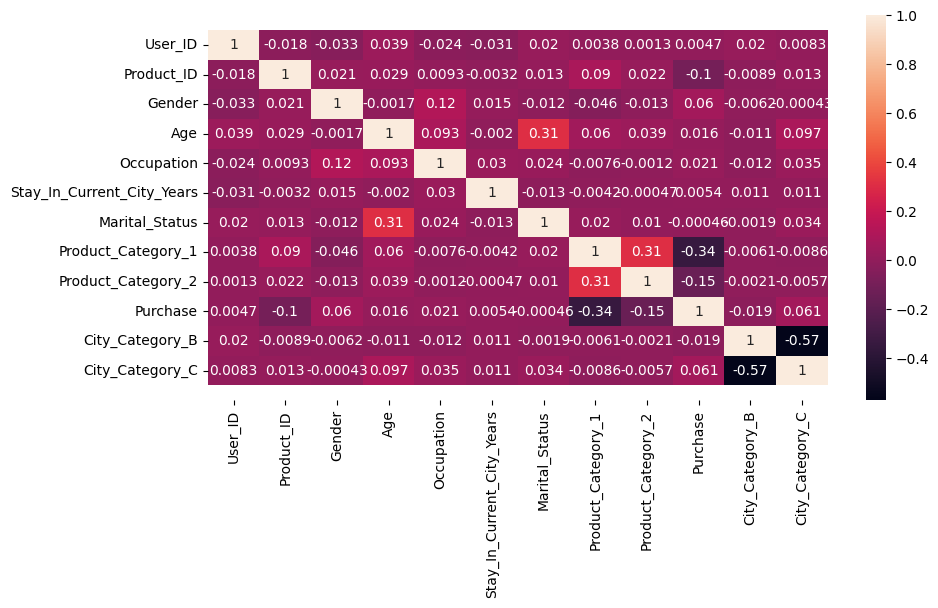

In [ ]:
plt.figure(figsize=(10, 5))
cor = sales.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [56]:
X = sales.drop('Purchase',axis=1)
y = sales['Purchase']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [57]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

predict = lr.predict(test_input)

submission['Purchase'] = predict
submission.to_csv('LR.csv', index=False)

In [58]:
from sklearn.linear_model import Ridge

rr = Ridge(lpha=0.05,normalize=True)

predict = rr.predict(test_input)

submission['Purchase'] = predict
submission.to_csv('RR.csv', index=False)


TypeError: Ridge.__init__() got an unexpected keyword argument 'lpha'

In [59]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()

DT.fit(X,y)

predict = DT.predict(test_input)

submission['Purchase'] = predict
submission.to_csv('DT.csv',index=False)

In [60]:
DT2 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

DT2.fit(X,y)

predict = DT2.predict(test_input)

submission['Purchase'] = predict
submission.to_csv('DT2.csv',index=False)


In [61]:
DT3 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)

DT3.fit(X,y)

predict = DT3.predict(test_input)

submission['Purchase'] = predict
submission.to_csv('DT3.csv',index=False)

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X,y)
predict = rf.predict(test_input)

submission['Purchase'] = predict

submission.to_csv('rf1.csv',index=False)

In [ ]:


rf2 = RandomForestRegressor(random_state = 3,max_depth=10,n_estimators=25)
rf2.fit(X,y)
predict = rf2.predict(test_input)

submission['Purchase'] = predict

submission.to_csv('rf2.csv',index=False)

In [ ]:
rf3 = RandomForestRegressor(random_state=3,max_depth=10,min_samples_split=500,oob_score=True)
rf3.fit(X,y)
predict = rf3.predict(test_input)

submission['Purchase'] = predict

submission.to_csv('rf3.csv',index=False)

In [ ]:
rf4 = RandomForestRegressor(n_estimators=30,random_state=3,max_depth=15,min_samples_split=100,oob_score=True)
rf4.fit(X,y)
predict = rf4.predict(test_input)

submission['Purchase'] = predict
submission.to_csv('rf4.csv',index=False)

In [ ]:
from xgboost import XGBRegressor

xgb1 = XGBRegressor()
xgb1.fit(X,y)
predict = xgb1.predict(test_input)

submission['Purchase'] = predict

submission.to_csv('XGB1.csv',index=False)

In [ ]:
xgb2 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb2.fit(X,y)
predict = xgb2.predict(test_input)

submission['Purchase'] = predict

submission.to_csv('XGB2.csv',index=False)

In [ ]:
xgb3 = XGBRegressor(n_estimators=500,max_depth=10,learning_rate=0.05)
xgb3.fit(X,y)
predict = xgb3.predict(test_input)

submission['Purchase'] = predict

submission.to_csv('XGB3.csv',index=False)

In [ ]:
xgb4 = XGBRegressor(n_estimators=6,max_depth=500)
xgb4.fit(X,y)
predict = xgb4.predict(test_input)

submission['Purchase'] = predict

submission.to_csv('XGB4.csv',index=False)

In [ ]:
xgb5 = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)
xgb5.fit(X,y)
predict = xgb5.predict(test_input)

submission['Purchase'] = predict

submission.to_csv('XGB5.csv',index=False)

In [ ]:
xgb6 = XGBRegressor(n_estimators=450,max_depth=8,learning_rate=0.076)
xgb6.fit(X,y)
predict = xgb6.predict(test_input)

submission['Purchase'] = predict

submission.to_csv('XGB6.csv',index=False)

In [ ]:
xgb7 = XGBRegressor(n_estimators=470,max_depth=9,learning_rate=0.06)
xgb7.fit(X,y)
predict = xgb7.predict(test_input)

submission['Purchase'] = predict

submission.to_csv('XGB7.csv',index=False)